# [CompuCell3D](http://compucell3d.org) in a Jupyter Notebook

> CompuCell3D is an open-source simulation environment for multi-cell, single-cell-based modeling of tissues, organs and organisms.

>It uses Cellular Potts Model to model cell behavior.

>This project is funded by the NIH and EPA.

>Compucell3D is led by Maciej Swat (IU), James Glazier(IU) and Roshan D'Souza (U.Wisc. Milwaukee) 

## Structure of the Simulations directory tree

* DATA_ROOT
    - ...
    - Sim2_cc3d_dd_MM_yyyy_hh_mm_ss
        * LatticeData
            - vtk_files ... **Here are the data**
        * Simulation
            - xml & python files ...
    
    
    - ...
    


### Parsing xml and python files

This is used for parameters management

In [22]:
import os
from xml.etree import ElementTree
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import vtk
from vtk.util.numpy_support import vtk_to_numpy

from skimage.filters import rank
from skimage.morphology import disk


from skimage import filters
from skimage.future import graph

from skimage import measure
from scipy import special

from IPython.display import Markdown, display


In [23]:
%matplotlib inline


In [24]:
%pdb

Automatic pdb calling has been turned OFF


In [165]:
# TODO: do a widget for that
DATA_ROOT = '/home/guillaume/Projets/NeuroBlasts/CC3D_sims/'

folder_num = 1


data_dirs = os.listdir(DATA_ROOT)
data_dirs.sort()
data_dirs = [os.path.join(DATA_ROOT, d) for d in data_dirs]
data_dirs = [d for d in data_dirs if os.path.isdir(d)]


data_dir_0 = data_dirs[0]
data_dir_1 = data_dirs[2]


def parse_cc3d(data_dir, simname):
    
    sim_dict = {}
    sim_str = []

    sim_str.append('## File used: ')
    sim_str.append('Using: `{}`'.format(data_dir))

    
    xml_file = os.path.join(data_dir+'/Simulation/{}.xml'.format(simname))
    py_file = os.path.join(data_dir+'/Simulation/{}Steppables.py'.format(simname))

    xml_tree = ElementTree.ElementTree(file=xml_file)
    xml_root = xml_tree.getroot()

    for child in xml_root:

        if child.tag == 'Potts':
            steps = int(child.find('Steps').text)
            dim = {k: int(v) for k, v 
                   in child.find('Dimensions').items()}
            sim_dict['dim'] = dim
            sim_dict['steps'] = steps
        elif child.get('Name') == 'Contact':
            energies = child.findall('Energy')
            energies = {'{}-{}'.format(energy.attrib['Type1'],
                                       energy.attrib['Type2']):
                        float(energy.text) for energy in energies}

    sim_dict['energies'] = energies
    
    sim_str.append('<hr/>')
    sim_str.append('## Energies: ')
    for k, v in energies.items():
        sim_str.append('{}: {}'.format(k, v))
    

    pysettings = []
    
    with open(py_file) as pf:
        start_parse = False
        for line in pf.readlines():
            if line.startswith('# <parameter settings>'):
                start_parse = True
            elif (start_parse 
                  and not line.startswith('#')
                  and len(line) > 3):
                pysettings.append(line[:-1])
            elif line.startswith('# </parameter settings>'):
                break
    
    
    sim_dict['pysettings'] = pysettings
    
    sim_str.append('<hr/>\n')
    sim_str.append('## python set variables:')
    for p in pysettings:
        sim_str.append(p)

    vtk_dir = os.path.join(data_dir,'LatticeData')

    vtk_files = [os.path.join(vtk_dir, f) 
                 for f in os.listdir(vtk_dir)
                 if f.endswith('.vtk')]
    vtk_files.sort()
    sim_dict['vtk_files'] = vtk_files
    
    sim_str.append('<hr/> \n')
    sim_str.append('##  VTK files\n')
    sim_str.append('starts: {}\n stops: {}'.format(vtk_files[0], vtk_files[-1]))
    return sim_dict, sim_str

sim_dict0, sim_str0 = parse_cc3d(data_dir_0, simname='Sim2')
sim_dict1, sim_str1 = parse_cc3d(data_dir_1, simname='Sim2')


exec(' '.join(sim_dict0['pysettings'])) #of course this is unsafe, I know it
sim_dict0['py_params'] = params.copy()

exec(' '.join(sim_dict1['pysettings']))
sim_dict1['py_params'] = params.copy()


import json
with file(data_dir_0+'.json', 'w') as fp:
    json.dump(sim_dict0, fp)

with file(data_dir_1+'.json', 'w') as fp:
    json.dump(sim_dict1, fp)

    
display(Markdown('\n \n'.join(sim_str0)))

display(Markdown('\n \n'.join(sim_str1)))

#for l in sim_str: print(l)

## File used: 
 
Using: `/home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_27_58`
 
<hr/>
 
## Energies: 
 
Medium-CancerStemCell: 10.0
 
CancerStemCell-CancerStemCell: 1.0
 
CancerStemCell-NonCancerous: 1.0
 
NonCancerous-NonCancerous: 1.0
 
Medium-Medium: 10.0
 
Medium-NonCancerous: 10.0
 
<hr/>

 
## python set variables:
 
params = {
 
    'growth_rate': 0.2,
 
    'P_sr': 0.5,
 
    'P_ar': 0.4,
 
    'cell_critical_volume': 50,
 
    'targetVolume': 25,
 
    'lambdaVolume': 10,
 
    'prolif_potential': 4,
 
    'neighbor_dep': False
 
    }
 
<hr/> 

 
##  VTK files

 
starts: /home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_27_58/LatticeData/Step_0000.vtk
 stops: /home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_27_58/LatticeData/Step_0950.vtk

## File used: 
 
Using: `/home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_28_59`
 
<hr/>
 
## Energies: 
 
Medium-CancerStemCell: 10.0
 
CancerStemCell-CancerStemCell: 1.0
 
CancerStemCell-NonCancerous: 4.0
 
NonCancerous-NonCancerous: 1.0
 
Medium-Medium: 10.0
 
Medium-NonCancerous: 10.0
 
<hr/>

 
## python set variables:
 
params = {
 
    'growth_rate': 0.2,
 
    'P_sr': 0.5,
 
    'P_ar': 0.4,
 
    'cell_critical_volume': 50,
 
    'targetVolume': 25,
 
    'lambdaVolume': 10,
 
    'prolif_potential': 4,
 
    'neighbor_dep': False
 
    }
 
<hr/> 

 
##  VTK files

 
starts: /home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_28_59/LatticeData/Step_0000.vtk
 stops: /home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_28_59/LatticeData/Step_0950.vtk

In [166]:
for d in data_dirs: print(d)

/home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_27_58
/home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_28_30
/home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_28_59
/home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_29_21
/home/guillaume/Projets/NeuroBlasts/CC3D_sims/Sim2_cc3d_09_21_2015_16_29_47


In [177]:
def parse_vtk(vtk_file, sim_dict, data_fields):
    
    dim = sim_dict['dim']
    reader = vtk.vtkStructuredPointsReader()
    #reader = vtkUnstructuredGridReader()
    reader.SetFileName(vtk_file)
    reader.Update()
    field_data = reader.GetOutput()
    out_data = {}
    for data_field in data_fields:
        out_data[data_field] = vtk_to_numpy(
            field_data.GetPointData().GetArray(data_field)).reshape((dim['x'], dim['y']))
    reader.CloseVTKFile()
    return out_data    
    

def parse_all_vtks(sim_dict, field_names):
    vtk_files = sim_dict['vtk_files']
    num_steps = len(vtk_files)
    dim = sim_dict['dim']
    data_fields = {field: np.zeros((num_steps, dim['x'], dim['y']))
                   for field in field_names}
    step_values = []
    for i, vtk_file in enumerate(vtk_files):
        step_values.append(int(vtk_file.split('.')[0][-3:]))
        frame_data = parse_vtk(vtk_file, sim_dict, field_names)
        for key, val in frame_data.items():
            data_fields[key][i] = val
    return data_fields, np.array(step_values)


class Tumor:
    '''
    Container class
    '''
    field_names = ['CellType', 'CellId', 'CellAge'] # 'ClusterId' is not used yet

    def __init__(self, sim_dict):
        self.sim_dict = sim_dict
        self.data_fields, self.step_values = parse_all_vtks(sim_dict, field_names)
        
    def get_idxs(self):
        
        cell_types, cell_ids = self.data_fields['CellType'], self.data_fields['CellId']
        e_idx = []
        v_idx = []
        for mcs, cell_type, cell_id in zip(self.step_values, cell_types, cell_ids):
            rag = graph.rag_mean_color(cell_type, cell_id)
            direct = [(mcs, s, t) for s, t in rag.edges()]
            fliped = [(mcs, t, s) for s, t in rag.edges()]
            e_idx.extend(direct + fliped)
            v_idx.extend([(mcs, cell_id) for cell_id in rag.nodes()])

        self.e_idx = pd.MultiIndex.from_tuples(e_idx, 
                                               names=['t', 'srce', 'trgt'])
        self.v_idx = pd.MultiIndex.from_tuples(v_idx, 
                                               names=['t', 'cell'])
        
    def get_cell_df(self):

        cell_data = ['type', 'age', 'area', 'cx', 'cy']
        self.cell_df = pd.DataFrame(index=self.v_idx, columns=cell_data)

        for i, mcs in enumerate(self.step_values):
            cell_type = self.data_fields['CellType'][i]
            cell_id = self.data_fields['CellId'][i]
            cell_age = self.data_fields['CellAge'][i]
            properties = measure.regionprops(cell_id.astype(np.int))
            for p in properties:
                lbl = p['label']
                self.cell_df.loc[(mcs, lbl), 'area'] = p['area']
                cx, cy = p['centroid']
                self.cell_df.loc[(mcs, lbl), 'cx'] = cx
                self.cell_df.loc[(mcs, lbl), 'cy'] = cy

                self.cell_df.loc[(mcs, lbl), 'age'] = cell_age[int(cx), int(cy)]
                self.cell_df.loc[(mcs, lbl), 'type'] = cell_type[int(cx), int(cy)]


    def get_edge_df(self):
        edge_columns = ['srce_type', 'trgt_type']
        self.edge_df = pd.DataFrame(index=self.e_idx, columns=edge_columns)

        t_idx = self.e_idx.get_level_values(level='t')
        srce_idx = self.e_idx.get_level_values(level='srce')
        trgt_idx = self.e_idx.get_level_values(level='trgt')

        self.srce_idx = pd.MultiIndex.from_arrays([t_idx, srce_idx], names=['t', 'cell'])
        self.trgt_idx = pd.MultiIndex.from_arrays([t_idx, trgt_idx], names=['t', 'cell'])

        self.edge_df['srce_type'] = self.cell_df['type'].loc[self.srce_idx].values
        self.edge_df['trgt_type'] = self.cell_df['type'].loc[self.trgt_idx].values

        self.edge_df['type_diff'] = self.edge_df.trgt_type == self.edge_df.srce_type

        self.edge_df = self.edge_df.drop(0, level='srce')
        self.edge_df = self.edge_df.drop(0, level='trgt')
                
        
tumor0 = Tumor(sim_dict0)
tumor1 = Tumor(sim_dict1)


In [178]:

def get_pix_entropy():
    pix_entropy = rank.entropy(cell_type_field.astype(np.uint8), disk(2))


for tumor in [tumor0, tumor1]:
    tumor.data_fields['PixelEntropy'] = np.array([rank.entropy(cell_type.astype(np.uint8), disk(2))
                                                  for cell_type in tumor.data_fields['CellType']])


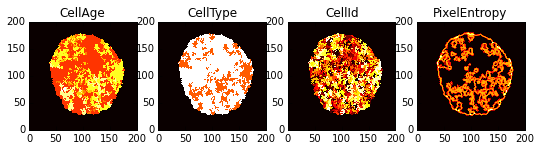

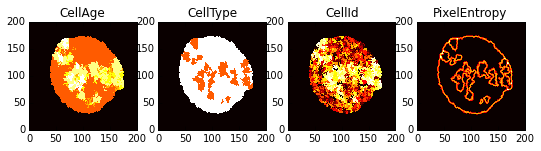

In [179]:
dpi = 90. # pixel per inch 
pix_width = 800
pix_height = 300

%matplotlib inline
frame_num = -1
f_size_i = (pix_width/dpi, pix_height/dpi)

def show_fields(tumor, frame_num):
    fig, axes = plt.subplots(1, len(tumor.data_fields))
    fig.set_size_inches(f_size_i)

    for ax, (name, field) in zip(axes, tumor.data_fields.items()):
        ax.imshow(field[frame_num], cmap='hot', origin='lower', interpolation='nearest')
        ax.set_title(name, fontdict={'fontsize':12})

for tumor in [tumor0, tumor1]:
    show_fields(tumor, frame_num)


In [180]:
print(tumor0.data_fields['PixelEntropy'][frame_num].mean())

0.177733835323


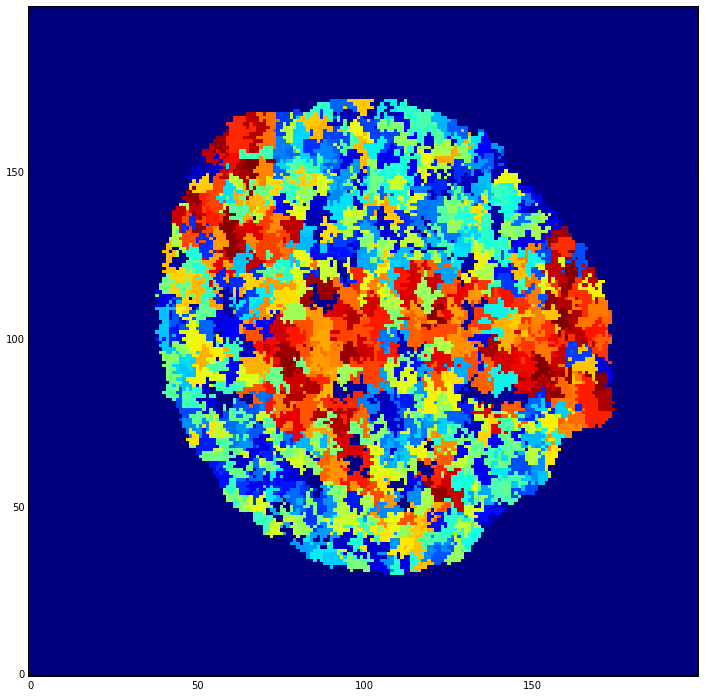

In [181]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 12)

ax.imshow(tumor1.data_fields['CellId'][frame_num],
           cmap='jet', origin='lower', interpolation='nearest')

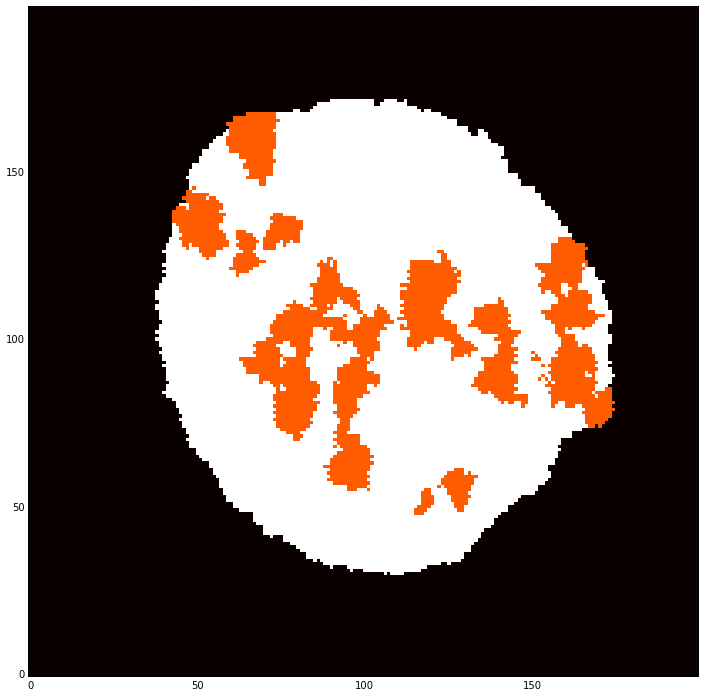

In [182]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
ax.imshow(tumor1.data_fields['CellType'][frame_num],
           cmap='hot', origin='lower', interpolation='nearest')

In [183]:
print(tumor1.data_fields['PixelEntropy'][frame_num].mean())

0.0943422382913


In [184]:
for tumor in [tumor0, tumor1]:
    tumor.get_idxs()
    tumor.get_cell_df()
    tumor.get_edge_df()


In [185]:
tumor0.cell_df.xs(1, level='cell').head()

,type,age,area,cx,cy
t,,,,,
0,1,0,25,91.96,92.12
50,2,0,36,92.44444,91.41667
100,2,1,25,88,91.4
150,2,1,38,86,90.42105
200,2,2,26,83.5,90.23077


In [189]:
tumor0.edge_df.head()

srce_type trgt_type type_diff
t srce trgt                              
0 1    2            1         2     False
       6            1         2     False
       7            1         1      True
  2    3            2         1     False
       8            2         2      True

In [190]:
def get_entropy(tumor):

    pis = tumor.edge_df.type_diff.groupby(
        level=['t', 'srce']).apply(
        lambda df: df.sum()/float(df.size))
    
    pis.index.names = ['t', 'cell']
    tumor.cell_df['pis'] = pis
    entropy = - pis * np.log2(pis)
    tumor.cell_df['entropy'] = entropy

for tumor in [tumor0, tumor1]:
    get_entropy(tumor)

In [191]:
def cell_averages(tumor):
    
    
    cell_df = tumor.cell_df
    tumor.is_csc = cell_df.loc[cell_df.type == 1].index 
    tumor.is_npc = cell_df.loc[cell_df.type == 2].index

    tumor.n_csc = (cell_df.type == 1).groupby(level='t').sum()
    tumor.n_npc = (cell_df.type == 2).groupby(level='t').sum()

    tumor.area_csc = cell_df.area.loc[tumor.is_csc].groupby(level='t').apply(np.mean)
    tumor.area_npc = cell_df.area.loc[tumor.is_npc].groupby(level='t').apply(np.mean)
    
    tumor.entropy_csc = cell_df.entropy.loc[tumor.is_csc].groupby(level='t').apply(np.mean)
    tumor.entropy_npc = cell_df.entropy.loc[tumor.is_npc].groupby(level='t').apply(np.mean)
    
    tumor.pis_csc = cell_df.pis.loc[tumor.is_csc].groupby(level='t').apply(np.mean)
    tumor.pis_npc = cell_df.pis.loc[tumor.is_npc].groupby(level='t').apply(np.mean)
    
    

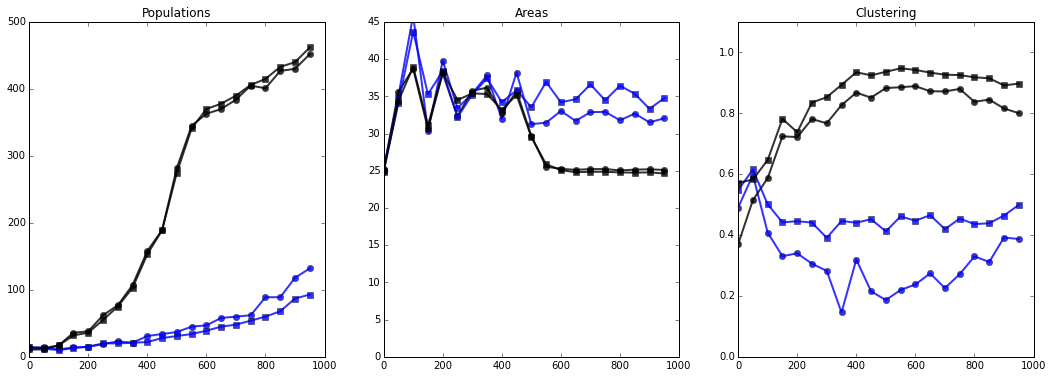

In [194]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18, 6)


for tumor, style in zip([tumor0, tumor1], ['o-', 's-']):
    cell_averages(tumor)

    axes[0].plot(tumor.n_csc.index, tumor.n_csc, 'b'+style, lw=2, alpha=0.8)
    axes[0].plot(tumor.n_npc.index, tumor.n_npc, 'k'+style, lw=2, alpha=0.8)
    axes[0].set_title('Populations')

    axes[1].plot(tumor.area_csc.index, tumor.area_csc, 'b'+style, lw=2, alpha=0.8)
    axes[1].plot(tumor.area_npc.index, tumor.area_npc, 'k'+style, lw=2, alpha=0.8)
    axes[1].set_title('Areas')
    axes[1].set_ylim(0, 45)
    

    axes[2].plot(tumor.pis_csc.index, tumor.pis_csc, 'b'+style, lw=2, alpha=0.8)
    axes[2].plot(tumor.pis_npc.index, tumor.pis_npc, 'k'+style, lw=2, alpha=0.8)
    axes[2].set_title('Clustering')
    axes[2].set_ylim(0, 1.1)
    
    

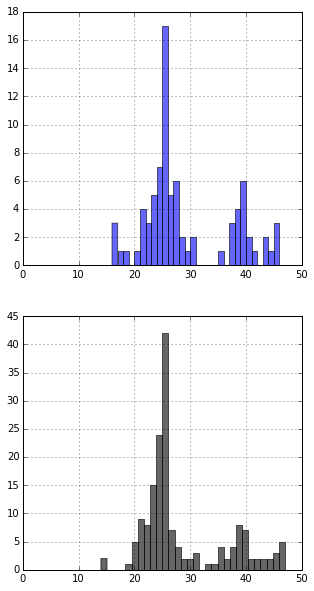

In [197]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(5, 10)
cell_df.area.loc[tumor.is_csc].hist(bins=30, color='b', alpha=0.6, ax=axes[0])
cell_df.area.loc[tumor.is_npc].hist(bins=30, color='k', alpha=0.6, ax=axes[1])
for ax in axes:
    ax.set_xlim(0, 50)

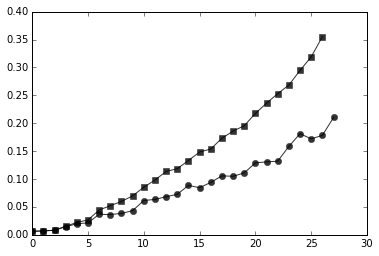

In [126]:
fig, ax = plt.subplots()
ax.plot(tumor0.data_fields['PixelEntropy'].mean(axis=-1).mean(axis=-1), 'ko-', alpha=0.8)
ax.plot(tumor1.data_fields['PixelEntropy'].mean(axis=-1).mean(axis=-1), 'ks-', alpha=0.8)


In [108]:
from skimage import io

In [111]:
ls 

area_color_coded_relative_over_area_color_coded_relative v2.tif
area_color_coded_relative v2.tif
cmaurange_1.tif
tracked_cells_resized_1.tif
tracked_cells_resized_2.tif
tracked_cells_resized_3.tif
tracked_clone_001_over_area_color_coded_relative modif PS.tif
tracked_clone_CSC_over_area_color_coded_relative.FINAL PICTURE.tif


In [115]:
in_vivo_path = '../../InVivo_data/'
segmented = io.imread(os.path.join(in_vivo_path, 'tracked_cells_resized_1.tif'))
types = io.imread(os.path.join(in_vivo_path, 'csc_cells.tif'))


In [116]:
types.shape, segmented.shape

((891, 989, 3), (891, 989, 3))

In [119]:
np.unique(segmented[...,0]).shape

(245,)

In [120]:
from skimage import color

In [121]:
segmented_hsv = color.convert_colorspace(segmented, 'RGB', 'HSV')

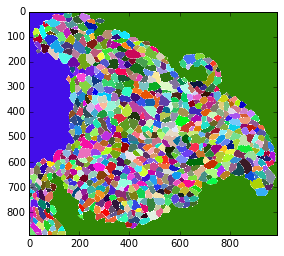

In [129]:
plt.imshow(segmented)

In [128]:
segmented_hsv

array([[[ 0.        ,  0.        ,  1.        ],
        [ 0.        ,  0.        ,  1.        ],
        [ 0.        ,  0.        ,  1.        ],
        ..., 
        [ 0.        ,  0.        ,  1.        ],
        [ 0.        ,  0.        ,  1.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.        ,  0.        ,  1.        ],
        [ 0.70700152,  0.93991416,  0.91372549],
        [ 0.70700152,  0.93991416,  0.91372549],
        ..., 
        [ 0.2790404 ,  0.96350365,  0.5372549 ],
        [ 0.2790404 ,  0.96350365,  0.5372549 ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.        ,  0.        ,  1.        ],
        [ 0.70700152,  0.93991416,  0.91372549],
        [ 0.70700152,  0.93991416,  0.91372549],
        ..., 
        [ 0.2790404 ,  0.96350365,  0.5372549 ],
        [ 0.2790404 ,  0.96350365,  0.5372549 ],
        [ 0.        ,  0.        ,  1.        ]],

       ..., 
       [[ 0.        ,  0.        ,  1.        ],
        